In [1]:
from importdata import data
from fft import *
from mobility import *
from permutationentropy import *
from utils import *
from lempelziv import *
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from parameters import *

import matplotlib.pyplot as plt


The BIS data is universally longer than the corresponding EEG data. 
It is assumed that the recording of the BIS data started after the recording of the EEG data.
This cell trims the BIS data accordingly.

In [2]:
for case in data:
    eeg_duration = case['EEG'].shape[1]/sampling_rate
    bis_duration = case['bis'].shape[1]/bis_sampling_rate
    difference = bis_duration - eeg_duration
    trim_length = int(round(difference * bis_sampling_rate))
    case['bis'] = case['bis'][:, trim_length :]
    bis_duration = case['bis'].shape[1]/bis_sampling_rate



In [3]:

eeg_train_data = [case['EEG'][0] for case in data] #converts to single dimension list
bis_train_data = [case['bis'][0] for case in data]


signal_lengths = [len(case) for case in eeg_train_data]


In [4]:
decomposed_eeg_train_data = [fft(case, sampling_rate) for case in eeg_train_data] 
decomposed_eeg_train_time_domain = convert_decomposed_to_time_domain(decomposed_eeg_train_data) 
decomposed_eeg_train_time_domain_power = convert_decomposed_amplitude_to_power(decomposed_eeg_train_time_domain) 


In [5]:
mobility_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, calculate_mobility, sampling_rate, signal_lengths, mobility_window_duration, mobility_overlap_fraction)
pe_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, PE, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)
lzc_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, LZC_single_band, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)

mobility_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, calculate_mobility, sampling_rate, signal_lengths, mobility_window_duration, mobility_overlap_fraction)
pe_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, PE, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)
lzc_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, LZC_single_band, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)

In [6]:
mobility_amplitude_bis_train_dict = associate_features_with_BIS(mobility_amplitude_array_train, bis_train_data, mobility_window_duration, mobility_overlap_fraction, bis_sampling_rate)
mobility_amplitude_train_r2 = linear_regression(mobility_amplitude_bis_train_dict)
print(f'mobility amplitude train r2{mobility_amplitude_train_r2}')

mobility_power_bis_train_dict = associate_features_with_BIS(mobility_power_array_train, bis_train_data, mobility_window_duration, mobility_overlap_fraction, bis_sampling_rate)
mobility_power_train_r2 = linear_regression(mobility_power_bis_train_dict)
print(f'mobility power train r2{mobility_power_train_r2}')

pe_amplitude_bis_train_dict = associate_features_with_BIS(pe_amplitude_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
pe_amplitude_train_r2 = linear_regression(pe_amplitude_bis_train_dict)
print(f'pe amplitude train r2{pe_amplitude_train_r2}')

pe_power_bis_train_dict = associate_features_with_BIS(pe_power_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
pe_power_train_r2 = linear_regression(pe_power_bis_train_dict)
print(f'pe power train r2 {pe_power_train_r2}')

lzc_amplitude_bis_train_dict = associate_features_with_BIS(lzc_amplitude_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
lzc_amplitude_train_r2 = linear_regression(lzc_amplitude_bis_train_dict)
print(f'lzc amplitude train r2 {lzc_amplitude_train_r2}')

lzc_power_bis_train_dict = associate_features_with_BIS(lzc_power_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
lzc_power_train_r2 = linear_regression(lzc_power_bis_train_dict)
print(f'lzc power train r2 {lzc_power_train_r2}')



length feature data: 752
length of bis_flat: 752
length feature data: 967
length of bis_flat: 967
length feature data: 2556
length of bis_flat: 2556
length feature data: 780
length of bis_flat: 780
length feature data: 462
length of bis_flat: 462
length feature data: 1005
length of bis_flat: 1005
length feature data: 1211
length of bis_flat: 1211
length feature data: 1579
length of bis_flat: 1579
length feature data: 1148
length of bis_flat: 1148
length feature data: 1229
length of bis_flat: 1229
length feature data: 2524
length of bis_flat: 2524
length feature data: 3985
length of bis_flat: 3985
length feature data: 814
length of bis_flat: 814
length feature data: 618
length of bis_flat: 618
length feature data: 2611
length of bis_flat: 2611
length feature data: 1423
length of bis_flat: 1423
length feature data: 1520
length of bis_flat: 1520
length feature data: 731
length of bis_flat: 731
length feature data: 860
length of bis_flat: 860
length feature data: 1939
length of bis_flat: 1

Text(0.5, 1.0, 'Mobility')

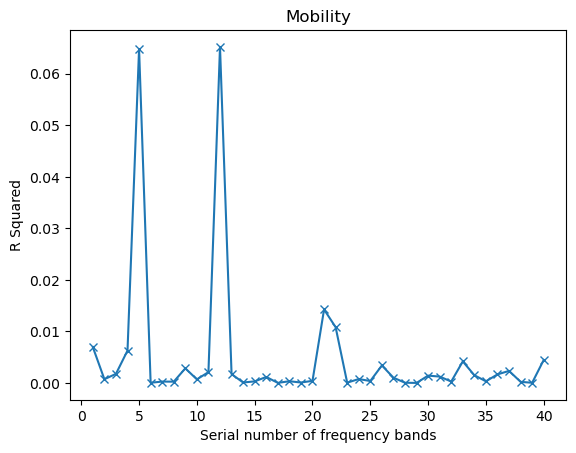

In [7]:
r2_mobility = list(mobility_amplitude_train_r2.values()) + list(mobility_power_train_r2.values())
frequency_bands_mobility = list(range(1, len(r2_mobility) + 1))

plt.plot(frequency_bands_mobility, r2_mobility, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Mobility")





Text(0.5, 1.0, 'Permutation Entropy')

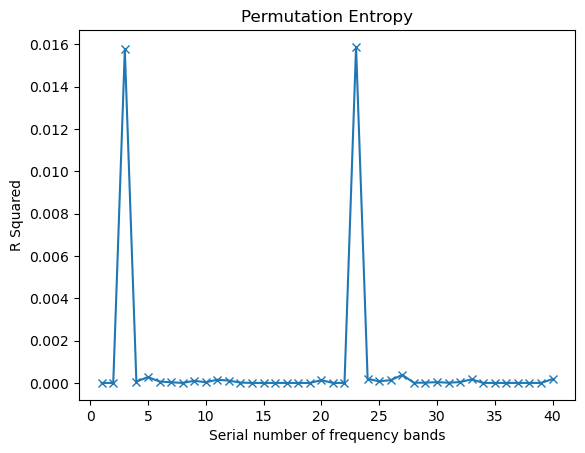

In [8]:
r2_pe = list(pe_amplitude_train_r2.values()) + list(pe_power_train_r2.values())
frequency_bands_pe = list(range(1, len(r2_pe) + 1))

plt.plot(frequency_bands_pe, r2_pe, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Permutation Entropy")

Text(0.5, 1.0, 'Lempel-Ziv Complexity')

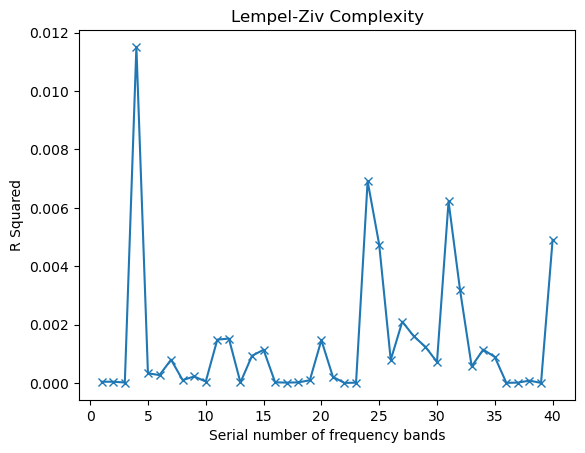

In [9]:
r2_lzc = list(lzc_amplitude_train_r2.values()) + list(lzc_power_train_r2.values())
frequency_bands_lzc = list(range(1, len(r2_lzc) + 1))

plt.plot(frequency_bands_lzc, r2_lzc, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Lempel-Ziv Complexity")